<a href="https://colab.research.google.com/github/SherZhou/Computational-Physics/blob/main/Assignment_2_2_Advection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import animation
from matplotlib import cm
import copy

In [ ]:
def advection(x, q, dt, dx, c, step):
    t_list=[0]
    q_ftfs = copy.deepcopy(q)
    q_ftcs = copy.deepcopy(q)
    q_lf = copy.deepcopy(q)
    q_lax = copy.deepcopy(q)
    
    for i in range(1,step):
        # t_list.append(i)
        if i % 10 == 0:
            print('Iteration=', i)
        for j in range(1, len(x)-1):

            # FTCS
            q_ftcs[i,j] = q_ftcs[i-1,j] - (c/2)*(dt/dx)  * (q_ftcs[i-1,j+1] - q_ftcs[i-1,j-1]) 
            # FTFS
            q_ftfs[i,j] = q_ftfs[i-1,j] - c * (dt / dx) * (q_ftfs[i-1,j+1] - q_ftfs[i-1,j])
            # print(i,j,q_ftfs[i,j])
            #Lax-Wendroff
            q_lax[i,j] = q_lax[i-1,j] - (c / 2) * (dt / dx) * (q_lax[i-1,j+1] - q_lax[i-1,j-1])+(c ** 2 / 2) * ((dt / dx) ** 2) * (q_lax[i-1,j+1] - 2 * q_lax[i-1,j] + q_lax[i-1,j-1])           
            # Leap Frog
            if i<2:
              q_lf[i,j]=q_lax[i,j]
            else:
              q_lf[i,j] = q_lf[i-2,j]-c*(dt/dx)*(q_lf[i-1,j+1]-q_lf[i-1,j-1])

    
    return q_ftfs,q_ftcs,q_lf,q_lax
    # return q_ftfs

In [ ]:
dx = 0.1   
x_min = 0
x_max = 10
dt=1
step=1000
q = np.zeros((step,int((x_max-x_min)/dx)))
q[0][:int((x_max-x_min)/(5*dx))] = 1

x = np.arange(x_min, x_max, dx)   

    # intialization
c = 0.1
    # # courant number
    # nu = c * dt / dx
    # print('Courant number=', nu)
q_ftfs,q_ftcs,q_lf,q_lax = advection(x, q, dt, dx, c, step)

Iteration= 10
Iteration= 20
Iteration= 30
Iteration= 40
Iteration= 50
Iteration= 60
Iteration= 70
Iteration= 80
Iteration= 90
Iteration= 100
Iteration= 110
Iteration= 120
Iteration= 130
Iteration= 140
Iteration= 150
Iteration= 160
Iteration= 170
Iteration= 180
Iteration= 190
Iteration= 200
Iteration= 210
Iteration= 220
Iteration= 230
Iteration= 240
Iteration= 250
Iteration= 260
Iteration= 270
Iteration= 280
Iteration= 290
Iteration= 300
Iteration= 310
Iteration= 320
Iteration= 330
Iteration= 340
Iteration= 350
Iteration= 360
Iteration= 370
Iteration= 380
Iteration= 390
Iteration= 400
Iteration= 410
Iteration= 420
Iteration= 430
Iteration= 440
Iteration= 450
Iteration= 460
Iteration= 470
Iteration= 480
Iteration= 490
Iteration= 500
Iteration= 510
Iteration= 520
Iteration= 530
Iteration= 540
Iteration= 550
Iteration= 560
Iteration= 570
Iteration= 580
Iteration= 590
Iteration= 600
Iteration= 610
Iteration= 620
Iteration= 630
Iteration= 640
Iteration= 650
Iteration= 660
Iteration= 670
Iter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars


In [ ]:
q_ftcs.max()

3.7288551211262016e+148

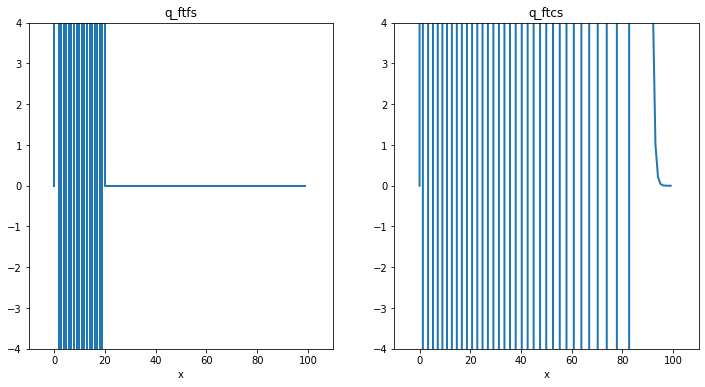

In [ ]:
fig=plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2)
ax1.set_xlabel('x')
ax1.set_title('q_ftfs')
ax2.set_xlabel('x')
ax2.set_title('q_ftcs')
ax1.set_xlim(-10,110)
ax2.set_xlim(-10,110)
ax1.set_ylim(-4,4)
ax2.set_ylim(-4,4)


x_list=np.arange(0,(x_max-x_min)/dx)

def animate(i):
    xx=x_list
    yy=q_ftfs[i]
    xx1=x_list
    yy1=q_ftcs[i]
    line1.set_data(xx, yy)
    line2.set_data(xx1,yy1)
    return (line1,line2)
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)
rc('animation', html='jshtml')
anim

In [ ]:
q_lf.max()

2.0

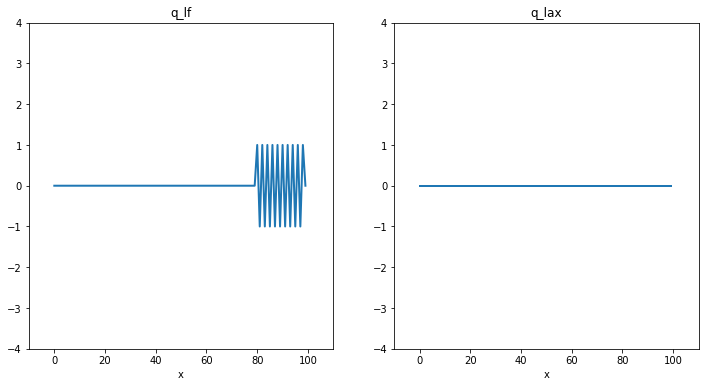

In [ ]:
fig=plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2)
ax1.set_xlabel('x')
ax1.set_title('q_lf')
ax2.set_xlabel('x')
ax2.set_title('q_lax')
ax1.set_xlim(-10,110)
ax2.set_xlim(-10,110)
ax1.set_ylim(-4,4)
ax2.set_ylim(-4,4)

step=100
x_list=np.arange(0,step)

def animate(i):
    xx=x_list
    yy=q_lf[i]
    xx1=x_list
    yy1=q_lax[i]
    line1.set_data(xx, yy)
    line2.set_data(xx1,yy1)
    return (line1,line2)
anim = animation.FuncAnimation(fig, animate, frames=100, interval=300, blit=True)
rc('animation', html='jshtml')
anim

In [ ]:
# set parameters given above
n=1000 #t=n*tau
L=400
h=1
v_max=33
rho_max=1
tau=h/v_max